# Aufgabe 1 - Akku-Abenteuer: Tobi's Optimale Routenplanung

Den Code immer nachvollziehbar kommentieren! Bitte beachtet, dass das Notebook von Anfang bis Ende ohne Fehler durchlaufen muss und dass die requirements.txt Datei aktualisiert wird. 

## Teilaufgabe a): lageplan.png laden und verarbeiten

(21, 21, 4)


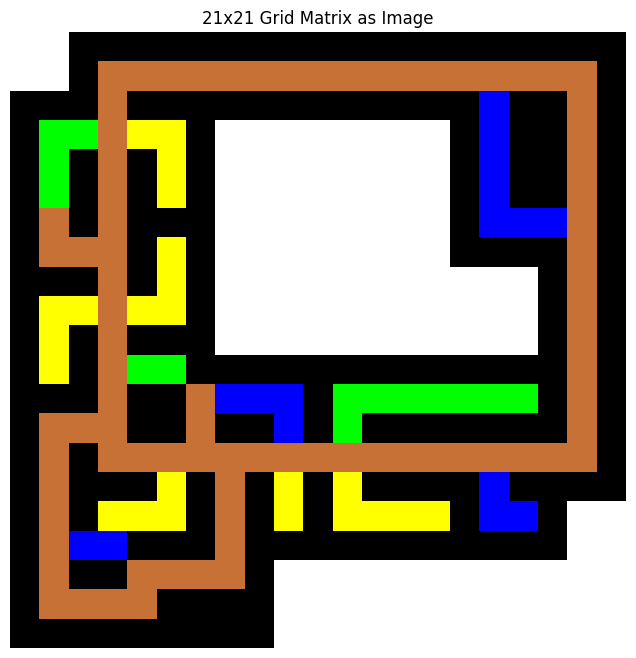

[[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1 -1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  1  0]
 [ 0  2  2  1  4  4  0 -1 -1 -1 -1 -1 -1 -1 -1  0  3  0  0  1  0]
 [ 0  2  0  1  0  4  0 -1 -1 -1 -1 -1 -1 -1 -1  0  3  0  0  1  0]
 [ 0  2  0  1  0  4  0 -1 -1 -1 -1 -1 -1 -1 -1  0  3  0  0  1  0]
 [ 0  1  0  1  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0  3  3  3  1  0]
 [ 0  1  1  1  0  4  0 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  1  0]
 [ 0  0  0  1  0  4  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  0]
 [ 0  4  4  1  4  4  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  0]
 [ 0  4  0  1  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  0]
 [ 0  4  0  1  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  1  3  3  3  0  2  2  2  2  2  2  2  0  1  0]
 [ 0  1  1  1  0  0  1  0  0  3  0  2  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0]
 [ 0  1  0

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def map_color_to_value(color):
    """
    Maps an RGBA color tuple to a specific integer value representing a cell type.

    Parameters
    ----------
    color : tuple
        A tuple of 4 integers (R, G, B, A), each in the range 0-255.

    Returns
    -------
    int
        An integer code for the cell type:
        - 0: black (wall)
        - -1: white (outside)
        - 2: green (office)
        - 3: blue (kitchen)
        - 4: yellow (laboratory)
        - 1: brown (hallway)
    """
    # For RGBA colors
    r, g, b, a = color

    # Define thresholds and mappings
    # Check for black (all values close to 0)
    if r <= 30 and g <= 30 and b <= 30:
        return 0

    # Check for white
    elif r >= 220 and g >= 220 and b >= 220:
        return -1

    # Check for green
    elif r <= 50 and g >= 200 and b <= 50:
        return 2

    # Check for blue
    elif r <= 50 and g <= 50 and b >= 200:
        return 3
    
    # Check for yellow
    elif r >= 200 and g >= 200 and b <= 50:
        return 4

    # Check for Brown
    else:
        return 1


# Load the image
img = np.array(Image.open('lageplan.png'))

# Calculate the cell size
cell_size = 420 // 21  # = 20 pixels

# Create an empty 21x21 matrix
matrix = np.zeros((21, 21, 4), dtype=np.uint8)

# Sample the center pixel of each cell
for i in range(21):
    for j in range(21):
        # Calculate center coordinates
        center_y = i * cell_size + cell_size // 2
        center_x = j * cell_size + cell_size // 2
        
        # Get color at center
        matrix[i, j] = img[center_y, center_x]

# Print or use the matrix
print(matrix.shape)  # Should be (21, 21, 4) for RGBA

matrix_image = Image.fromarray(matrix)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(matrix_image)
plt.title("21x21 Grid Matrix as Image")
plt.axis('off')  
plt.show()

# Map Matrix to custom values instead of color vectors
mapped_matrix = np.zeros((21, 21), dtype=int)

for i in range(21):
    for j in range(21):
        mapped_matrix[i, j] = map_color_to_value(matrix[i, j])

# 3. Print the mapped matrix
print(mapped_matrix)


## Teilaufgabe b): Breitensuche

Start position value: (17, 3)
Goal position value: (3, 1)
Path found: True
Number of steps: 20
Number of explored nodes: 101


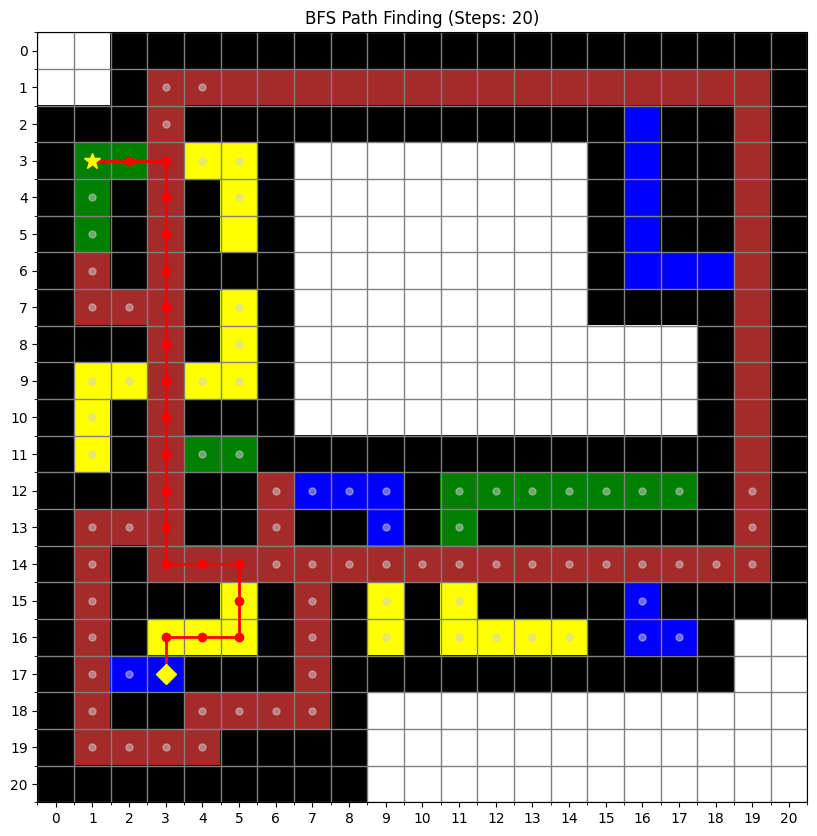

In [18]:
# Implement Breadth-First Search algorithm for pathfinding
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

def breadth_first_search(matrix, start, goal):
    """
    Performs BFS to find the shortest path from start to goal in the matrix.
    
    Parameters:
    ----------
    matrix : numpy.ndarray
        The grid representation where:
        - 0: wall (not traversable)
        - -1: outside (not traversable)
        - 1: hallway (traversable)
        - 2: office (traversable)
        - 3: kitchen (traversable)
    start : tuple
        Starting position (row, col)
    goal : tuple
        Goal position (row, col)
        
    Returns:
    -------
    tuple
        (path, explored_nodes, steps_count)
        where path is a list of positions from start to goal,
        explored_nodes is a set of all visited positions,
        steps_count is the number of steps in the final path
    """
    # Print the values at start and goal positions for debugging
    print(f"Start position value: {start_pos}")
    print(f"Goal position value: {goal_pos}")
    
    # Check if start or goal positions are valid (> 0 means traversable)
    if matrix[start] <= 0 or matrix[goal] <= 0:
        print("Start or goal position is not traversable!")
        return None, set(), 0
    
    # Initialize data structures
    queue = deque([start])
    explored = set([start])
    parent = {start: None}
    
    # Define possible movements (up, right, down, left)
    movements = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    
    # BFS main loop
    while queue:
        current = queue.popleft()
        
        # Check if goal is reached
        if current == goal:
            # Reconstruct path
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            path.reverse()  # Path from start to goal
            return path, explored, len(path) - 1
        
        # Explore neighbors
        for dr, dc in movements:
            r, c = current[0] + dr, current[1] + dc
            
            # Check if position is within bounds and not a wall or outside
            if (0 <= r < matrix.shape[0] and 
                0 <= c < matrix.shape[1] and 
                matrix[r, c] > 0 and 
                (r, c) not in explored):
                
                queue.append((r, c))
                explored.add((r, c))
                parent[(r, c)] = current
    
    # No path found
    print("BFS completed without finding a path")
    return None, explored, 0

def visualize_path(matrix, path, explored):
    """
    Visualizes the matrix, explored nodes, and the found path.
    """
    # Create a figure with a specific size and get the axes
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Create a custom colormap
    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'brown', 'green', 'blue', 'yellow'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    # Plot the matrix on the specified axes
    im = ax.imshow(matrix, cmap=cmap, norm=norm)
    
    # Set ticks at every integer position
    ax.set_xticks(np.arange(0, matrix.shape[1], 1))
    ax.set_yticks(np.arange(0, matrix.shape[0], 1))
    
    # Add grid lines offset by 0.5 in both directions
    ax.set_xticks(np.arange(-0.5, matrix.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, matrix.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.grid(which='major', visible=False)  # Hide major grid
    
    # Plot explored nodes
    for node in explored:
        if node not in path:  # Don't plot nodes in the path
            ax.plot(node[1], node[0], 'o', color='lightgray', markersize=5, alpha=0.5)
    
    # Plot the path
    if path:
        path_y = [node[0] for node in path]
        path_x = [node[1] for node in path]
        ax.plot(path_x, path_y, '-o', color='red', linewidth=2, markersize=6)
        
        # Mark start and goal
        ax.plot(path[0][1], path[0][0], 'D', color='yellow', markersize=10)
        ax.plot(path[-1][1], path[-1][0], '*', color='yellow', markersize=12)
    
    ax.set_title(f"BFS Path Finding (Steps: {len(path)-1 if path else 'No path found'})") 
    
    plt.show()

# Run BFS algorithm
start_pos = (17, 3)  # Given start position
goal_pos = (3, 1)    # Given goal position

path, explored, steps = breadth_first_search(mapped_matrix, start_pos, goal_pos)

# Print results
print(f"Path found: {path is not None}")
print(f"Number of steps: {steps}")
print(f"Number of explored nodes: {len(explored)}")

# Visualize the result
visualize_path(mapped_matrix, path, explored)


## Teilaufgabe c): A*-Algorithmus

## Teilaufgabe d): Greedy Best First Search-Algorithmus

## Teilaufgabe e): Dusseliger Doktorand